# Monthly check using pulsars

In [1]:
%matplotlib inline
from uw.like2.analyze import (sourceinfo, transientinfo, )
map( reload, (sourceinfo, transientinfo, ))
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly'))

In [5]:
import glob
files =  sorted(glob.glob('month*/sources.pickle'));
monthlist = [f.split('/')[0] for f in files];
monthinfo=monthinfo=[]
for month in monthlist:
    sinfo = sourceinfo.ExtSourceInfo(month, quiet=True)
    monthinfo.append(sinfo) 
dflist= []
for i,month in enumerate(monthinfo):
    month.df['month'] = i+1
    month.df['has_assoc'] = [a is not None for a in month.df.associations]
    dflist.append( month.df[month.df.transient][
            'ra dec glat glon ts pindex eflux a locqual has_assoc month roiname'.split()])
df = pd.concat(dflist) 
df.ix[0]

## Choose a pulsar to monitor

In [73]:
sourcename='PSR J0101-6422'
d =dict()
for i,month in enumerate(monthinfo):
    s = month.df.ix[sourcename]
    d[i+1]=dict(ts=s.ts, locqual=s.locqual, eflux=s.eflux, a=s.a)
df = pd.DataFrame(d).T
df[:10]

,a,eflux,locqual,ts
1,4.304533,3.043538,17.68,26.316936
2,0.010020,1.052227,0.09,5.598097
3,0.236153,1.989395,3.28,14.896053
4,0.010020,0.000051,0.09,0.000020
5,0.010020,0.302997,0.09,0.220517
6,0.059745,3.883769,0.23,51.605021
7,253946.428678,3.895630,17.68,28.378727
8,0.087043,2.346582,0.79,24.478451
9,0.094365,2.740057,0.59,26.922079
10,0.097004,2.788982,0.46,23.005511


Good months: 58/72


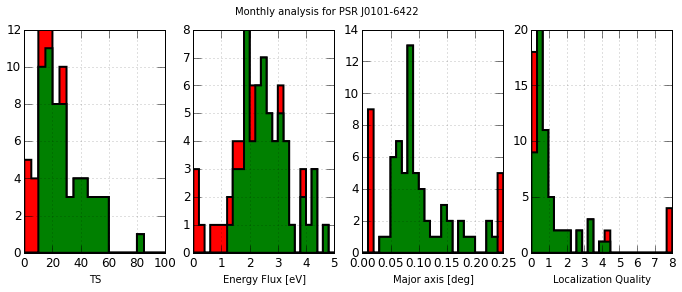

In [81]:
fig, axx = plt.subplots(1,4, figsize=(12,4))
hist_kw = dict(histtype='stepfilled', lw=2)
good = np.logical_not((df.ts<10) | (df.locqual>8) | (df.a<0.01) | (df.a>0.25))
print 'Good months: %d/%d' %(sum(good), len(good))
def histit(ax, name, bins, label=None):
    all = np.asarray(df[name],float).clip(bins[0],bins[-1])
    subset = np.asarray(df[good][name],float).clip(bins[0],bins[-1])
    ax.hist( all,  bins, color='red', **hist_kw)
    ax.hist( subset , bins, color='green', **hist_kw)
    ax.grid(True, alpha=0.5)
    ax.set_xlabel(name if label is None else label)
    
def a_hist(ax):
    histit(ax, 'a' ,np.linspace(0,0.25,26),  'Major axis [deg]')
    
def eflux_hist(ax):
    histit(ax, 'eflux', np.linspace(0,5,26), 'Energy Flux [eV]')

def ts_hist(ax):
    histit(ax, 'ts', np.linspace(0,100,21), 'TS')

def lq_hist(ax):
    histit(ax, 'locqual', np.linspace(0,8,26),'Localization Quality')
    
for f,ax in zip([ts_hist, eflux_hist, a_hist, lq_hist], axx.flatten()): f(ax)
plt.suptitle('Monthly analysis for %s' % sourcename)